<a href="https://colab.research.google.com/github/irravasyuk/SQL_2/blob/master/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D1%80%D1%96%D1%88%D0%B5%D0%BD%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/Used%20Car%20Dataset.csv", index_col="Unnamed: 0")
df.drop(columns=['car_name', 'registration_year', 'ownsership', 'transmission'], inplace=True)

Дані про ціни вживаних автомобілів у Індії
* car_name - назва авто у форматі 'рік компанія основна назва'
* registration_year - місяць та рік реєстрації
* ownsership - кількість власників у форматі 'Second owner'
* transmission - тип коробки передач
* insurance_validity - тип страховки
* fuel_type - вид палива
* seats - кількість сидінь
* kms_driven - пробіг
* manufacturing_year - рік виробництва, має тип object, потрібно застосувати astype(int)
* mileage(kmpl) - скільки кілометрів проїде за літр палива
* engine(cc) - об'єм двигуна у мл
* max_power(bhp) - потужність у кінських силах
* torque(Nm) - крутний момент двигуна
* price(in lakhs) - ціна у сто тисяч рупій

[Повний аналіз даних](https://www.kaggle.com/code/abdelrasoul/used-cars-prices-prediction)

In [3]:
df.head()

,insurance_validity,fuel_type,seats,kms_driven,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,Comprehensive,Petrol,5,56000,2017,7.81,2996.0,2996.0,333.0,63.75
1,Comprehensive,Petrol,5,30615,2020,17.40,999.0,999.0,9863.0,8.99
2,Comprehensive,Diesel,5,24000,2018,20.68,1995.0,1995.0,188.0,23.75
3,Comprehensive,Petrol,5,18378,2019,16.50,1353.0,1353.0,13808.0,13.56
4,Comprehensive,Petrol,5,44900,2019,14.67,1798.0,1798.0,17746.0,24.00


In [4]:
df = df[['fuel_type', 'kms_driven', 'engine(cc)', 'price(in lakhs)']]
df.head()

,fuel_type,kms_driven,engine(cc),price(in lakhs)
0,Petrol,56000,2996.0,63.75
1,Petrol,30615,999.0,8.99
2,Diesel,24000,1995.0,23.75
3,Petrol,18378,1353.0,13.56
4,Petrol,44900,1798.0,24.00


# Завдання 1
Очистіть дані від викидів(лише `price`), розділіть на тренувальну та тестову чатини

<Axes: >

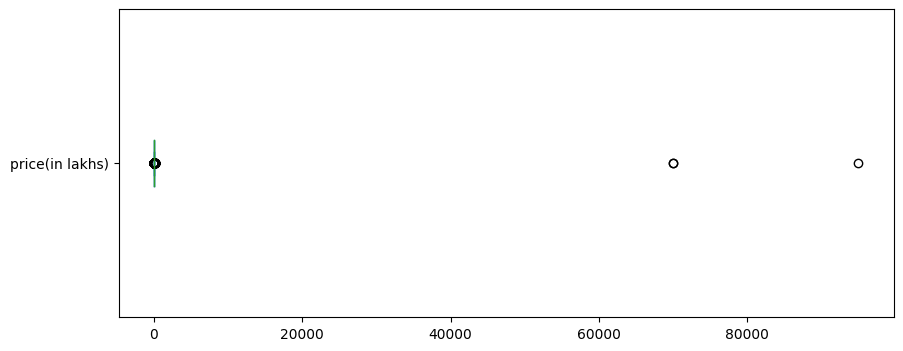

In [5]:
df['price(in lakhs)'].plot(kind='box', vert=False, figsize=(10,4))

In [6]:
q1 = df['price(in lakhs)'].quantile(0.25)
q3 = df['price(in lakhs)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['price(in lakhs)'] >= lower_bound) & (df['price(in lakhs)'] <= upper_bound)]

<Axes: >

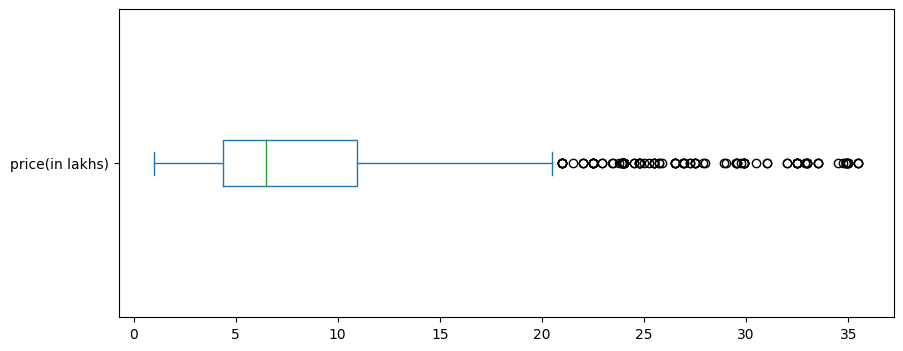

In [7]:
df['price(in lakhs)'].plot(kind='box', vert=False, figsize=(10,4))

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('price(in lakhs)', axis=1)
y = df['price(in lakhs)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df.head()

,fuel_type,kms_driven,engine(cc),price(in lakhs)
1,Petrol,30615,999.0,8.99
2,Diesel,24000,1995.0,23.75
3,Petrol,18378,1353.0,13.56
4,Petrol,44900,1798.0,24.00
5,Petrol,42000,1199.0,5.45


# Завдання 2
Створіть Pipeline для обробки даних

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, ['kms_driven', 'engine(cc)']),
    ('cat', cat_pipeline, ['fuel_type'])
])

# Завдання 3
Створіть остаточну модель та натренуйте її

In [11]:
from sklearn.tree import DecisionTreeRegressor

model = Pipeline([
    ("preprocessing", preprocessor),
    ("model", DecisionTreeRegressor(max_depth=3))
]
)
model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['kms_driven', 'engine(cc)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['fuel_type'])])),
                ('model', DecisionTreeRegressor(max_depth=3))])

In [12]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['kms_driven', 'engine(cc)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['fuel_type'])])),
                ('model', DecisionTreeRegressor(max_depth=3))])

# Завдання 4
Виведіть основні метрики моделі

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [15]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,3.01,3.59
RMSE,4.71,5.65
R2,0.57,0.38


# Завдання 5
Змініть параметри моделі та попробуйте покращити результат

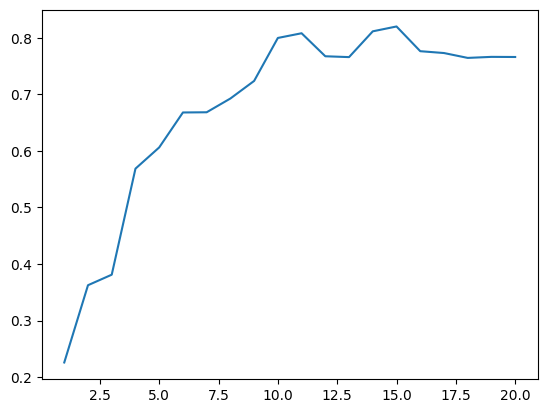

In [17]:
from sklearn import tree

depths = range(1, 21)
r2 = []

for depth in depths:
  model = Pipeline(
      [("prep", preprocessor),
      ("tree", tree.DecisionTreeRegressor(max_depth=depth,
                                          random_state=42)
      )])
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  r2_value = metrics.r2_score(y_test, y_pred)
  r2.append(r2_value)


plt.plot(depths, r2)

# Завдання 6
Збережіть модель

In [18]:
import joblib

joblib.dump(model, 'my_model.pkl')

['my_model.pkl']